In [2]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\ACER\Downloads\data.csv\data.csv',  encoding= 'ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.isnull().sum().sort_values(ascending= False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [6]:
(df.isnull().sum() / df.shape[0])*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
df['Description'].value_counts(normalize=True)

Description
WHITE HANGING HEART T-LIGHT HOLDER     0.004383
REGENCY CAKESTAND 3 TIER               0.004071
JUMBO BAG RED RETROSPOT                0.003995
PARTY BUNTING                          0.003195
LUNCH BAG RED RETROSPOT                0.003031
                                         ...   
Missing                                0.000002
historic computer difference?....se    0.000002
DUSTY PINK CHRISTMAS TREE 30CM         0.000002
WRAP BLUE RUSSIAN FOLKART              0.000002
PINK BERTIE MOBILE PHONE CHARM         0.000002
Name: proportion, Length: 4223, dtype: float64

In [9]:
df = df[~df['Description'].isnull()]
df.shape

(540455, 8)

In [10]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

In [11]:
df = df[~(df['CustomerID'].isnull())]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [12]:
df.shape

(406829, 8)

In [13]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [15]:
num_vars = df.select_dtypes(include= ['float','int'])
num_vars

,Quantity,UnitPrice,CustomerID
0,6,2.55,17850.0
1,6,3.39,17850.0
2,8,2.75,17850.0
3,6,3.39,17850.0
4,6,3.39,17850.0
...,...,...,...
541904,12,0.85,12680.0
541905,6,2.10,12680.0
541906,4,4.15,12680.0
541907,4,4.15,12680.0


<Axes: >

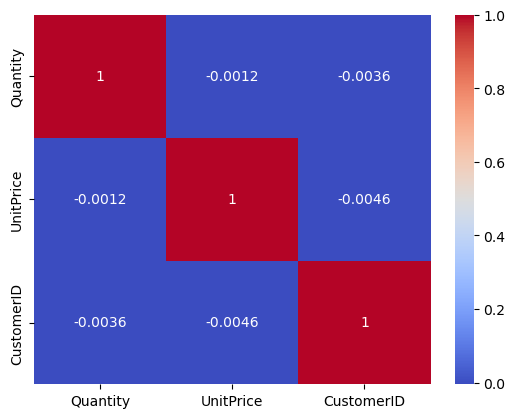

In [16]:
sns.heatmap(num_vars.corr(), annot= True, cmap= 'coolwarm')

In [17]:
import datetime

In [18]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [19]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [20]:
df['CustomerID'] = df['CustomerID'].astype('int')

In [21]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int32         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 26.4+ MB


In [23]:
df['CustomerID'] = df['CustomerID'].astype('str')

In [24]:
df['Sales'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [25]:
df['Year'] = df['InvoiceDate'].dt.year
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010


In [26]:
df['Month'] = df['InvoiceDate'].dt.month
df['Day_of_week'] = df['InvoiceDate'].dt.day_of_week
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Year,Month,Day_of_week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,2


In [27]:
df['Year'].value_counts()

Year
2011    379979
2010     26850
Name: count, dtype: int64

In [28]:
df['Month'].value_counts()

Month
11    65598
10    50695
12    44511
9     40822
5     28908
6     27836
3     27822
8     27662
7     27502
4     23198
1     21912
2     20363
Name: count, dtype: int64

In [29]:
df['Day_of_week'].value_counts()

Day_of_week
3    82374
2    70599
1    68110
0    66382
6    63237
4    56127
Name: count, dtype: int64

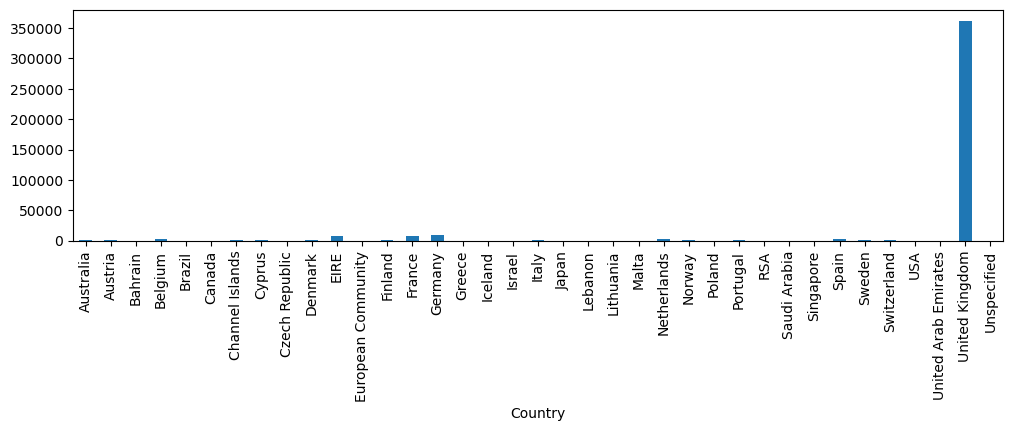

In [30]:
plt.figure(figsize= [12,3])
df.groupby(['Country'])['InvoiceNo'].count().plot.bar()
plt.show()

In [31]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Year,Month,Day_of_week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,2


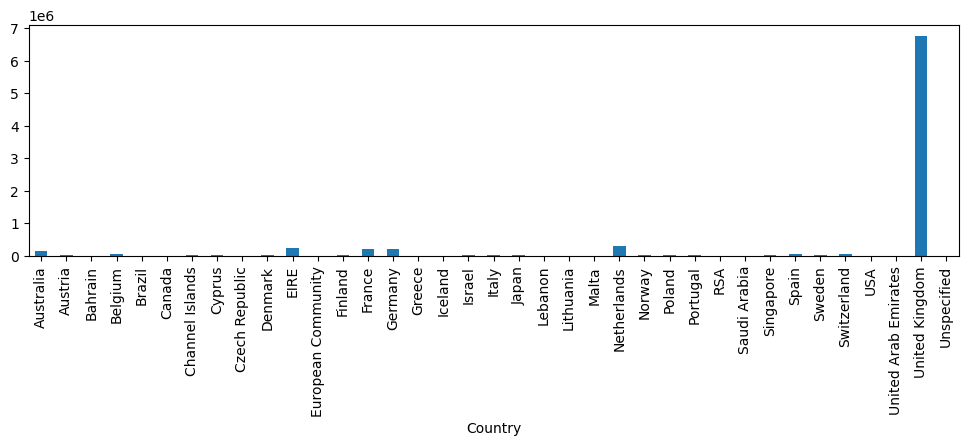

In [32]:
plt.figure(figsize= [12,3])
df.groupby(['Country'])['Sales'].sum().plot.bar()
plt.show()

In [33]:
df.shape

(406829, 12)

In [34]:
df[df['Country'] == 'United Kingdom'].shape

(361878, 12)

In [35]:
round((df.shape[0] - df[df['Country'] == 'United Kingdom'].shape[0] ) / df.shape[0] * 100, 2)

11.05

In [36]:
df = df[df['Country'] == 'United Kingdom']

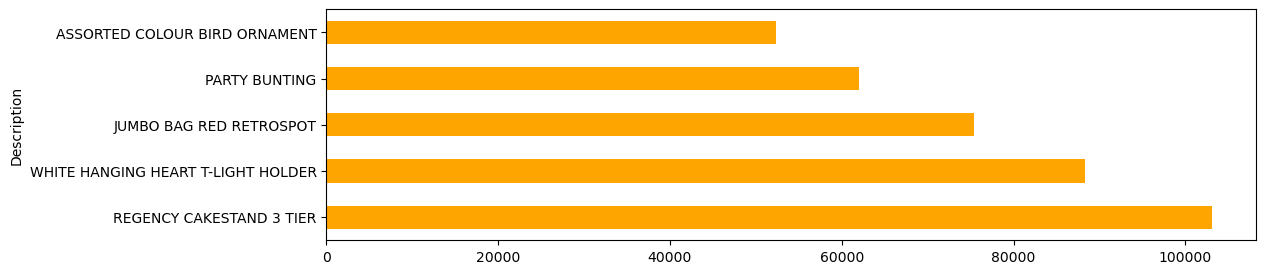

In [37]:
plt.figure(figsize=[12,3])
df.groupby('Description')['Sales'].sum().sort_values(ascending=False).head(5).plot.barh(color='orange')
plt.show()

In [38]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,Sales,Year,Month,Day_of_week
count,361878.000000,361878,361878.000000,361878.000000,361878.000000,361878.000000,361878.000000
mean,11.077029,2011-07-10 23:48:12.301493760,3.256007,18.702086,2010.932198,7.637809,2.634592
min,-80995.000000,2010-12-01 08:26:00,0.000000,-168469.600000,2010.000000,1.000000,0.000000
25%,2.000000,2011-04-06 17:25:00,1.250000,3.750000,2011.000000,5.000000,1.000000
50%,4.000000,2011-07-31 13:07:00,1.950000,10.200000,2011.000000,9.000000,2.000000
75%,12.000000,2011-10-23 11:39:00,3.750000,17.700000,2011.000000,11.000000,4.000000
max,80995.000000,2011-12-09 12:49:00,38970.000000,168469.600000,2011.000000,12.000000,6.000000
std,263.129266,NaN,70.654731,451.918484,0.251406,3.420499,1.949846


In [39]:
df = df[df['Quantity'] > 0]
df.shape

(354345, 12)

In [40]:
round(df.describe(),2)

,Quantity,InvoiceDate,UnitPrice,Sales,Year,Month,Day_of_week
count,354345.00,354345,354345.00,354345.00,354345.00,354345.00,354345.00
mean,12.05,2011-07-11 08:05:04.229606656,2.96,20.63,2010.93,7.65,2.64
min,1.00,2010-12-01 08:26:00,0.00,0.00,2010.00,1.00,0.00
25%,2.00,2011-04-07 11:40:00,1.25,4.16,2011.00,5.00,1.00
50%,4.00,2011-07-31 15:31:00,1.95,10.20,2011.00,9.00,2.00
75%,12.00,2011-10-23 13:49:00,3.75,17.70,2011.00,11.00,4.00
max,80995.00,2011-12-09 12:49:00,8142.75,168469.60,2011.00,12.00,6.00
std,190.43,NaN,17.86,326.03,0.25,3.42,1.96


In [41]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Year,Month,Day_of_week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,2


<Axes: xlabel='Year'>

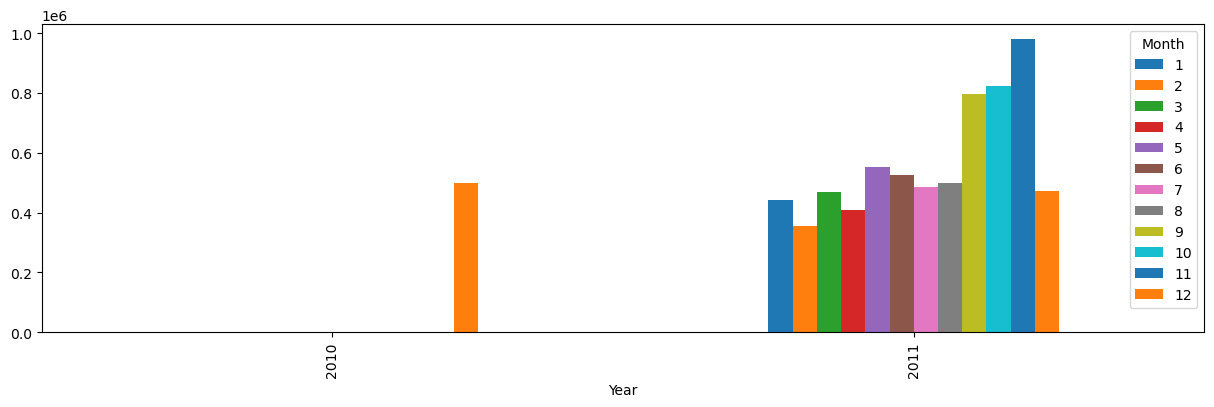

In [42]:
df.groupby(['Year', 'Month'])['Sales'].sum().reset_index().pivot(index='Year', columns='Month', values='Sales').plot.bar(figsize=(15, 4))

In [43]:
df_2011 = df[df['Year'] == 2011]

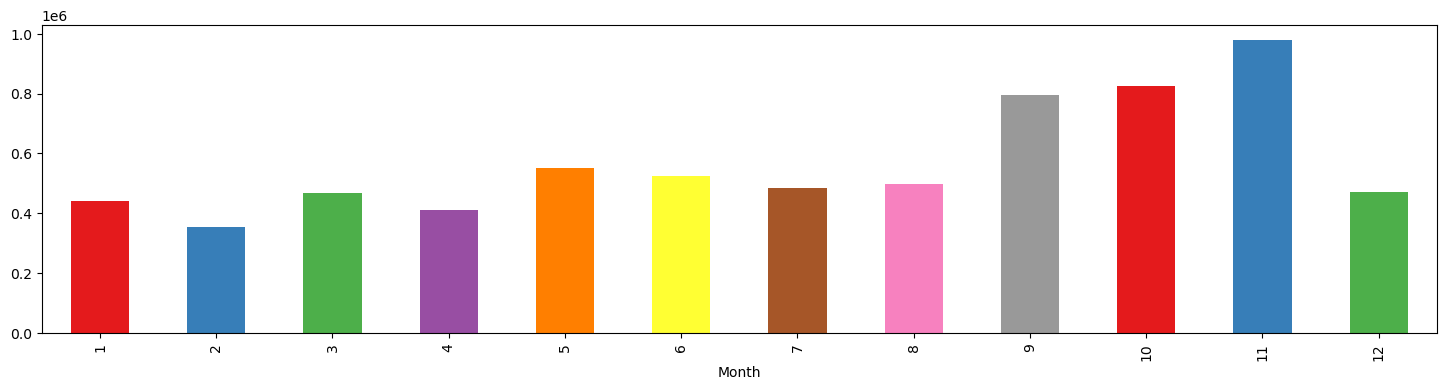

In [44]:
df_2011.groupby(['Month'])['Sales'].sum().plot.bar(figsize=[18,4], color= sns.color_palette("Set1"))
plt.show()

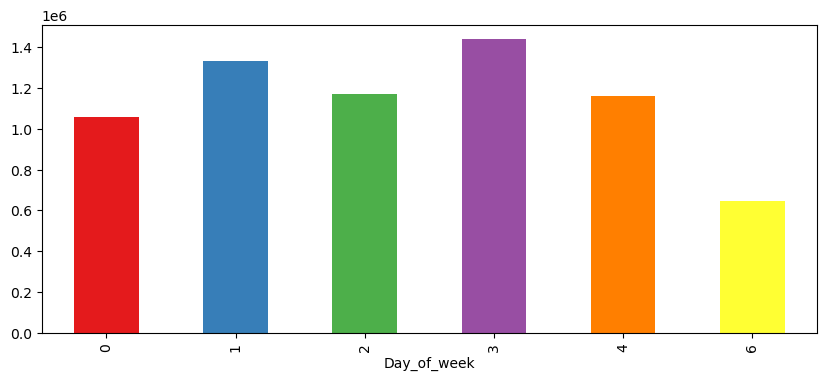

In [45]:
df_2011.groupby(['Day_of_week'])['Sales'].sum().plot.bar(figsize=[10,4], color= sns.color_palette("Set1"))
plt.show()

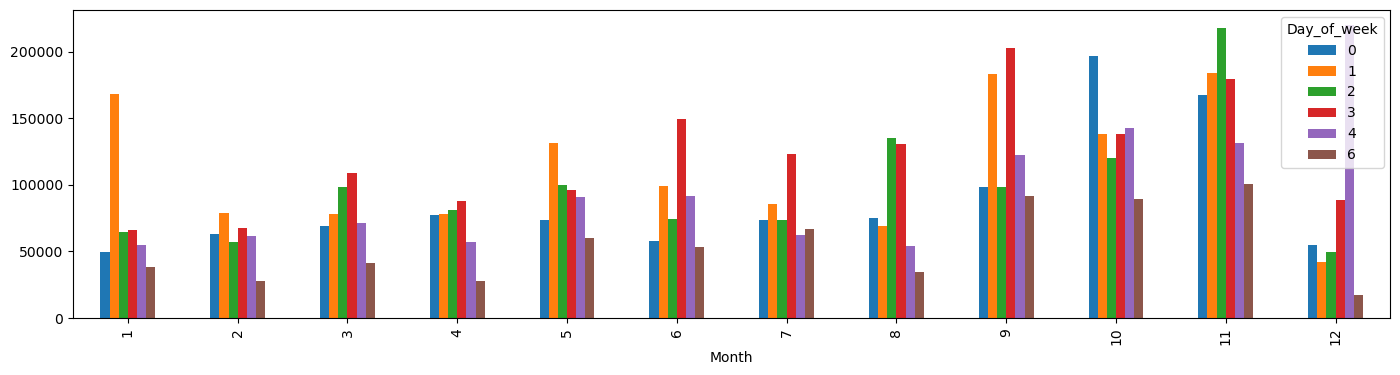

In [46]:
df_2011.groupby(['Month', 'Day_of_week'])['Sales'].sum().reset_index().pivot(index= 'Month', columns= 'Day_of_week', values= 'Sales').plot.bar(figsize= [17,4])
plt.show()

## Top 5 customer with most number of orders

In [47]:
df_2011.groupby(['CustomerID','Country'])['InvoiceNo'].count().reset_index().sort_values(by= 'InvoiceNo', ascending=False).head(5)

,CustomerID,Country,InvoiceNo
3505,17841,United Kingdom,7560
885,14096,United Kingdom,5111
2,12748,United Kingdom,3928
1242,14606,United Kingdom,2472
1735,15311,United Kingdom,2202


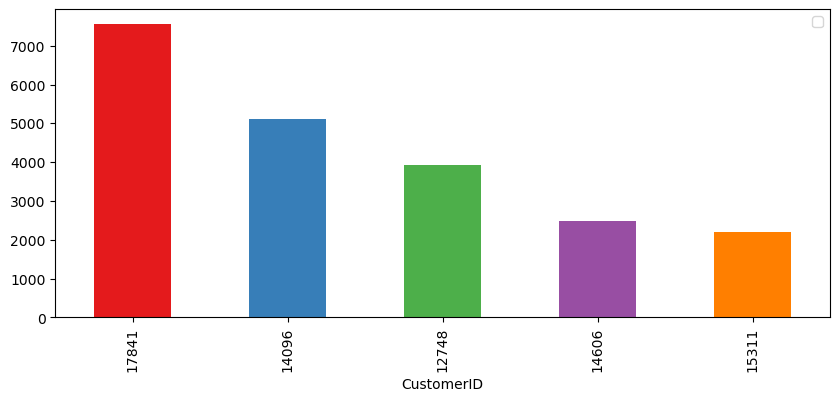

In [48]:
df_2011.groupby(['CustomerID','Country'])['InvoiceNo'].count().reset_index().sort_values(by= 'InvoiceNo', ascending=False).head(5).plot.bar(x='CustomerID', 
                                                                                                                                       y='InvoiceNo', 
                                                                                                                                       figsize=[10,4], 
                                                                                                                                       color= sns.color_palette("Set1"))
plt.legend('')
plt.show()

In [49]:
df_2011.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Year,Month,Day_of_week
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313,United Kingdom,19.5,2011,1,1
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,10.5,2011,1,1
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,10.5,2011,1,1
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313,United Kingdom,10.5,2011,1,1
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313,United Kingdom,12.5,2011,1,1


In [51]:
with pd.ExcelWriter('Cleaned_dataset.xlsx') as dataframe:
    df_2011.to_excel(dataframe, sheet_name='Cleaned_data', index=False)